## 3. Clustering
* This file focuses on clustering the songs on the basis of their features to identify similar tracks. 
* The similarity between tracks is later used to recommend songs on the basis of what is already in the list. 
### 3.1 Importing libraries

In [1]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

### 3.2 Song Features
* The file 'song_features.csv' contains a list of all the unique songs which appeared in the global rankings along with the features of each song.

In [8]:
song_features=pd.read_csv('~/SongRecommender/new_data/song_features.csv')
print(song_features.shape)
song_features.head(10)

(8524, 14)


,Track_Name,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,#DansLeTierquar (Lyon),0.755,0.600,6,-6.235,0,0.170,0.25800,0.000000,0.0848,0.370,160.023,101544,4
1,#DansLeTierquar (Marseille),0.803,0.798,4,-6.483,0,0.388,0.42800,0.000000,0.1080,0.188,135.942,115334,4
2,#DansLeTierquar (Nantes),0.805,0.612,2,-8.139,1,0.442,0.25800,0.000000,0.1160,0.303,155.036,102983,4
3,#FleKKsinonem,0.774,0.814,2,-4.963,1,0.212,0.04630,0.000000,0.1400,0.499,146.001,346118,4
4,#JM,0.841,0.638,2,-7.616,1,0.169,0.00612,0.000003,0.0772,0.316,100.021,211625,4
5,#JesuispasséchezSo EP 11,0.850,0.918,10,-4.483,0,0.217,0.44900,0.000000,0.0800,0.490,111.982,160467,4
6,#Natural,0.803,0.825,0,-3.594,0,0.053,0.09030,0.000000,0.1330,0.833,97.015,227013,4
7,#Rohffback,0.794,0.730,7,-5.290,1,0.260,0.03330,0.000000,0.4580,0.497,99.924,199089,4
8,#SNTL,0.695,0.733,11,-5.429,0,0.274,0.02360,0.000000,0.3530,0.509,150.053,209116,4
9,#VIKINGCLAP,0.483,0.996,2,-2.489,1,0.432,0.00441,0.000930,0.4450,0.187,127.970,191947,4


### 3.3 Dimensionality Reduction
* As the number of features of each song is large (13), Principal Component Analysis had been applied to reduce the number of dimensions to 2. 

In [9]:

pca = PCA(n_components=2)

X = song_features.iloc[:, 1:].values
sc = StandardScaler()
X_scaled= sc.fit_transform(X)
X_pca = pca.fit_transform(X_scaled)

print(X_pca)



[[-0.08696085 -1.65638591]
 [-0.26876543 -2.03925584]
 [ 0.2756154  -1.77751725]
 ...
 [-1.87651041  0.19565291]
 [-0.89313271  0.66149291]
 [-2.27699698  0.05161706]]


### 3.4 Clustering
* To find the ideal number of clusters for the data, the following techniques have been implemented:
    * The elbow method
    * Silhouette Score

#### 3.4.1 Elbow Method
* The results of the elbow method show that the ideal number of clusters for the songs is  4

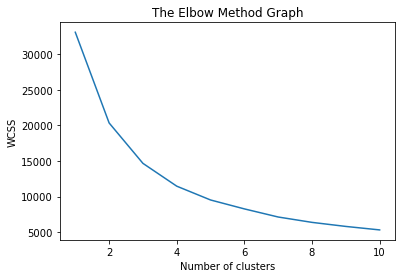

In [10]:
wcss=[]
for i in range(1,11): 
     kmeans = KMeans(n_clusters=i, init ='k-means++', max_iter=300,  n_init=10,random_state=0 )
     kmeans.fit(X_pca)
     wcss.append(kmeans.inertia_)
# print(wcss)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 3.4.2 Silhouette Score
* The results obtained through the elbow method, are validated by the Silhouette Score. The larger the solhouette score the better.
* The Silhouette score for '4' is acceptable, and hence the data is clustered into 4 groups. 

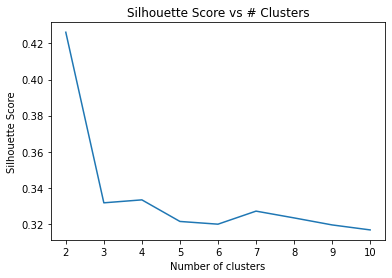

In [11]:
silhouette = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k).fit(X_pca)
  labels = kmeans.labels_
  silhouette.append(silhouette_score(X_pca, labels, metric = 'euclidean'))

# print(wcss)
plt.plot(range(2,11),silhouette)
plt.title('Silhouette Score vs # Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

#### 3.4.3 Clustering using K means

In [12]:
# fit kmeans object to data
kmeans = KMeans(n_clusters=4)
kmeans.fit(X_pca) 

print(kmeans.cluster_centers_)
clustered_values= kmeans.fit_predict(X_pca)

print(clustered_values) 

[[ 0.3678669  -1.07427586]
 [ 0.01932388  1.24408762]
 [ 3.28218917  0.24311183]
 [-1.29927364 -0.15570076]]
[1 1 1 ... 0 0 0]


#### 3.4.5 Plotting the clusters

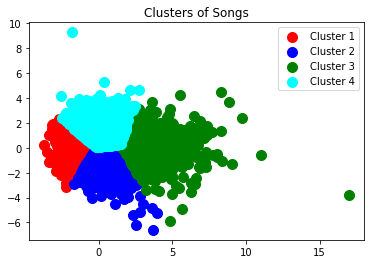

In [13]:
plt.scatter(X_pca[clustered_values==0, 0], X_pca[clustered_values==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X_pca[clustered_values==1, 0], X_pca[clustered_values==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X_pca[clustered_values==2, 0], X_pca[clustered_values==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X_pca[clustered_values==3, 0], X_pca[clustered_values==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.legend()
plt.title('Clusters of Songs')
plt.show()


#### 3.4.6 Saving the clusters
* The file 'track_list.csv' contains a list of unique songs that have been found in the ranking globally. 
* A column 'Cluster' is added with data about which cluster the song belongs to. 

In [14]:
track_list=pd.read_csv('~/SongRecommender/new_data/track_list.csv')

track_list['Cluster']=clustered_values
track_list.to_csv('~/SongRecommender/new_data/track_list.csv',index=False)
track_list.head(5)


,Track_Name,Artist,Cluster
0,#DansLeTierquar (Lyon),RK,1
1,#DansLeTierquar (Marseille),RK,1
2,#DansLeTierquar (Nantes),RK,1
3,#FleKKsinonem,Kreisais Krasts,3
4,#JM,Broederliefde,1
